# Imports

In [271]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [272]:
warnings.simplefilter("ignore")

In [273]:
df = pd.read_csv("data_1.csv")

# Exploration

In [274]:
df.head()

,player_id,battle_id,dt,player_group,in_battle_presence_time,damage_dealt,kills_made,vehicle_lvl,account_created_at
0,4acaed46f5c1f955031286b7115e6c494c047f705e7441...,dfcc03237ac70b54f1fe71b99be75ab46286f8d091536c...,27.11.22,B,832,0,0,8,16.11.22
1,c5a9edef16454d022d32adbd010c7773c7a5ca53717a06...,cfbee8667ffa06cf9cc808544e7137cacb0367a9fc4408...,20.10.22,B,142,423,0,8,28.11.15
2,4cc362ca0eac5fae41b6c56bb858803953d802b58af6fd...,01592abfe1b16666bb349dcf1f90bb0ecfd685d82a9c10...,25.11.22,A,208,1540,1,6,31.10.15
3,1a32f95ecb3174915c63c4be509e29a5bb37d16ecd2345...,0a705163ce3646518c91a50a722eea507f45c7827bd1ae...,13.10.22,B,707,2582,1,8,13.10.22
4,03f5e518c2a127c52eb7b2dc9ce28ad677f9d5e3d88053...,7970e8ba29ddbd6eaa2c982f61a0046dfb88e7ea97c00b...,18.10.22,A,283,133,0,7,29.04.14


<Axes: >

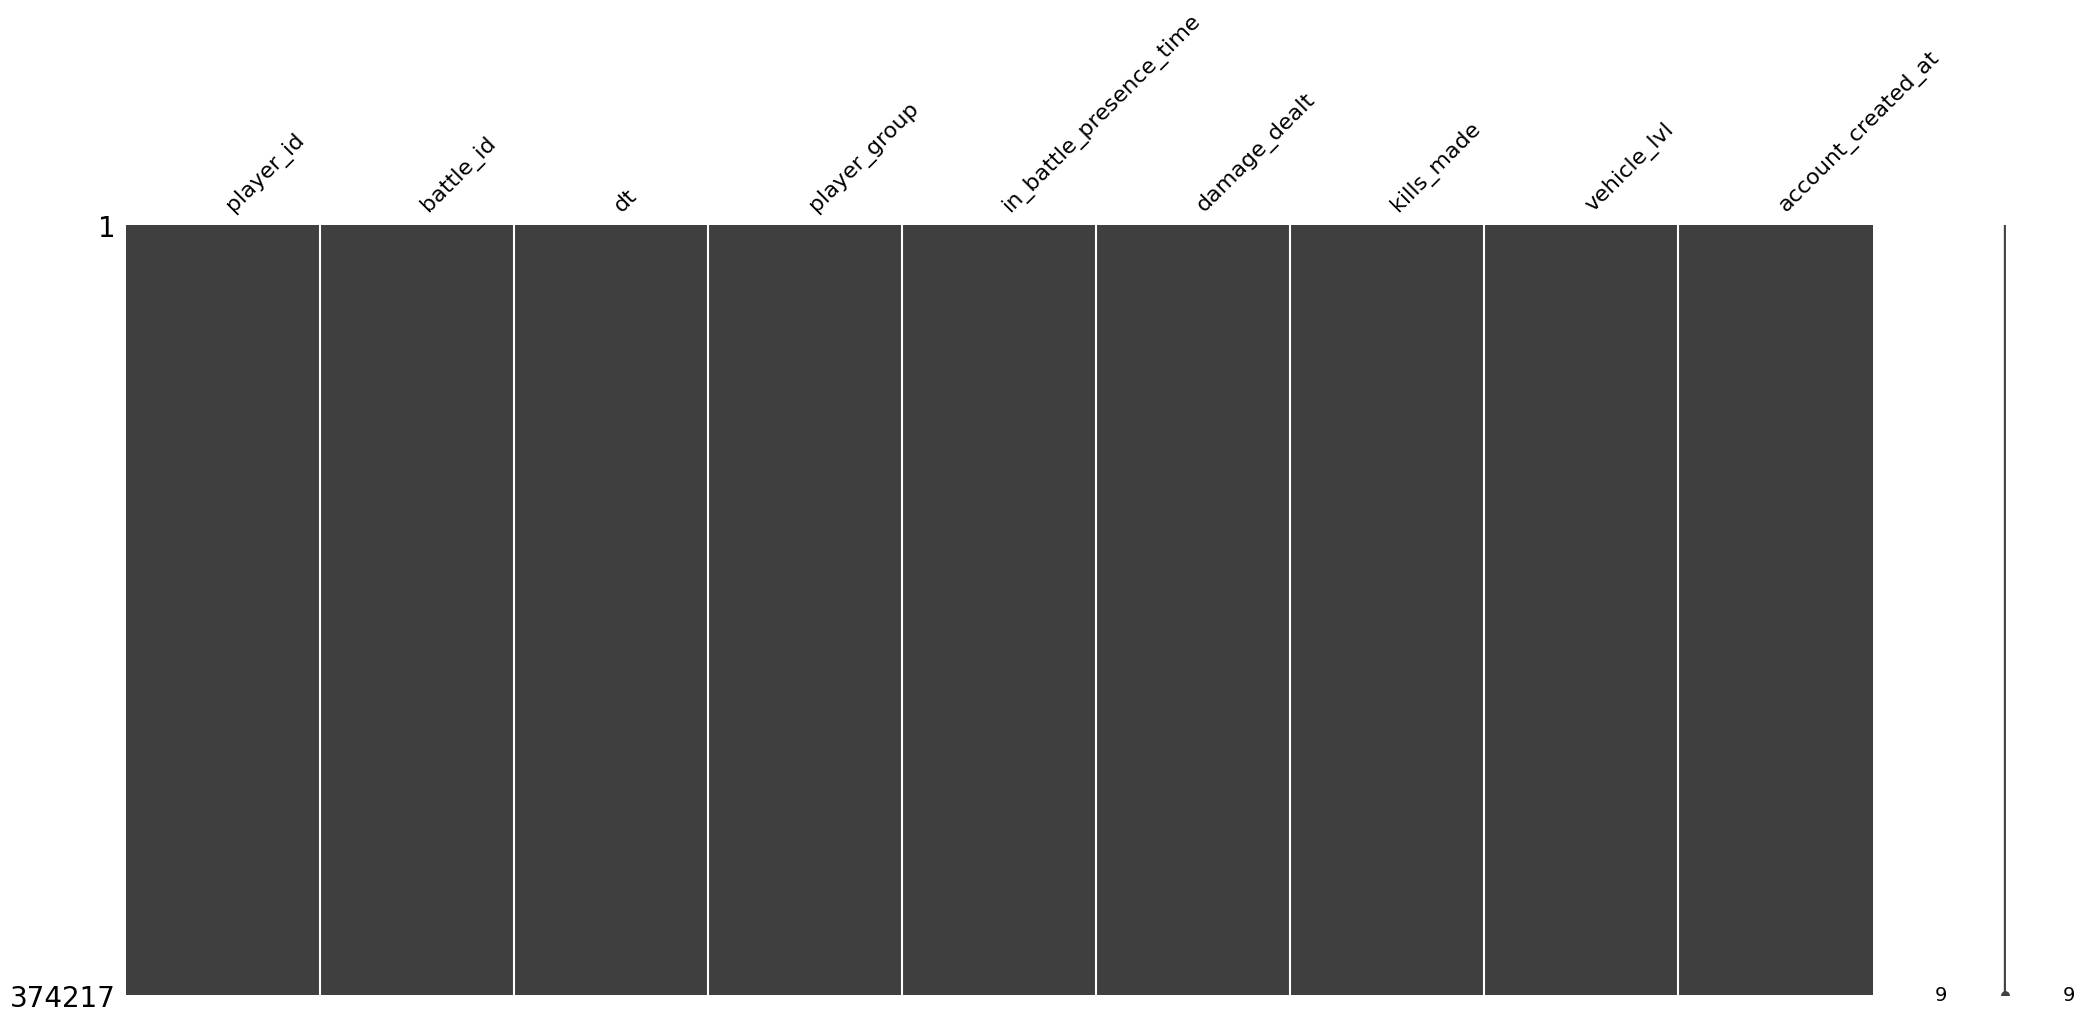

In [275]:
%matplotlib inline
msno.matrix(df)

Here we can see that our dataset has no missing value, so further work on N/A values is not required.
We can then dive deeper into the data.

df['dt'] = pd.to_datetime(df['dt'], format='%d/%m/%Y', errors='coerce')

In [276]:
df.describe()

,in_battle_presence_time,damage_dealt,kills_made,vehicle_lvl
count,374217.000000,374217.000000,374217.000000,374217.000000
mean,350.607273,956.662789,0.701817,7.151789
std,160.535720,923.346416,1.023907,2.032247
min,1.000000,0.000000,0.000000,1.000000
25%,243.000000,277.000000,0.000000,6.000000
50%,335.000000,711.000000,0.000000,8.000000
75%,433.000000,1381.000000,1.000000,9.000000
max,907.000000,9835.000000,10.000000,10.000000


In [277]:
df['player_group'] = df['player_group'].astype('category')
df['dt'] = pd.to_datetime(df['dt'])

In [278]:
games_played_per_player = df['player_id'].value_counts()
players_with_more_than_one_game = games_played_per_player[games_played_per_player > 1]
print(players_with_more_than_one_game)

player_id
48dc9e46dde7b79a62810104d3a2919b64d43054d3646120c8ed75cf1648d8ff    2793
2f09fb25958f4e2d226802baa498635850da680d00bbf351ccffcfa6afe07908    1999
6ee5b83ad20b63676f120366d5ed90aa3fb8e15406f05f11dc9991f5158c83c4    1960
3bb2796376d1a67460fd4de7b5df536074bd2e419a5d96fff568b63beec88180    1791
5709c12a86c4d678220c92318391b708353c9900eec5ff8952be1319c851c42a    1692
                                                                    ... 
0951607e198cb2e566ee4a36bda0f3acf9882354799314a992f568944eb99b9f       2
1a221b4d4e0a3a96c54400be58896eff2714f23053e66dec50626c9f74443bb8       2
1e1c7075b6cb24a63c72b4ae499e30c6dcb7a17dbe77f8606449d2e3e084f219       2
825eceda7c1e05893a7b6a804d090a9d95a5200b1a24c666234911902db83a46       2
81138fb0d7f8ba324a7930b171c5d6e644c809ce509d86c2d847fd51a981e45b       2
Name: count, Length: 2857, dtype: int64


I was curious about the content of the data, especially if it listed only unique players or if some of the players played many of the games listed.
It appears that we have different levels of engagement across our dataset

In [279]:
players_per_group = df['player_group'].value_counts()
print(players_per_group)

player_group
B    239895
A    134322
Name: count, dtype: int64


The previous conclusion got me to check the content of each group, and we can already see that group B is much more "populated" than group A.
This will educate the rest of our exploration.

In [280]:
games_played_per_group = df.groupby('player_group')['battle_id'].nunique()
print(games_played_per_group)

player_group
A    131237
B    231428
Name: battle_id, dtype: int64


Evidently, the number of games played is much higher in group B than group A in more or less similar proportions

In [281]:
avg_games_per_player = df.groupby('player_id')['battle_id'].count().mean()
print(avg_games_per_player)

130.98249912495623


In [292]:
battles_per_day_group = df.groupby(['dt', 'player_group'])['battle_id'].count().unstack()
print(battles_per_day_group)

player_group     A     B
dt                      
2022-01-11    2540  5463
2022-02-11    2375  4886
2022-03-11    2333  4776
2022-04-11    2377  5034
2022-05-11    3535  5763
2022-06-11    3497  6433
2022-07-11    2263  4731
2022-08-11    2203  4388
2022-09-11    2234  4174
2022-10-11    2348  4738
2022-10-13    1977  3792
2022-10-14    2213  4436
2022-10-15    2977  5395
2022-10-16    3054  5238
2022-10-17    2297  3745
2022-10-18    2376  4067
2022-10-19    2337  4427
2022-10-20    1633  3136
2022-10-21    2365  3956
2022-10-22    2782  4850
2022-10-23    3164  5291
2022-10-24    2328  3677
2022-10-25    2515  4055
2022-10-26    2350  3982
2022-10-27    2364  3666
2022-10-28    2611  4503
2022-10-29    3074  4708
2022-10-30    3242  5352
2022-10-31    2701  4917
2022-11-10    2484  3292
2022-11-11    2814  5167
2022-11-13    3427  6731
2022-11-14    2528  4327
2022-11-15    2608  4350
2022-11-16    2596  4479
2022-11-17    2623  4882
2022-11-18    2940  5373
2022-11-19    3559  6127


This quick check made us notice that we have quite a long period (10 days approx.) without any data, this could lead to some jumpy spikes in the following graphs

<Figure size 2000x1000 with 0 Axes>

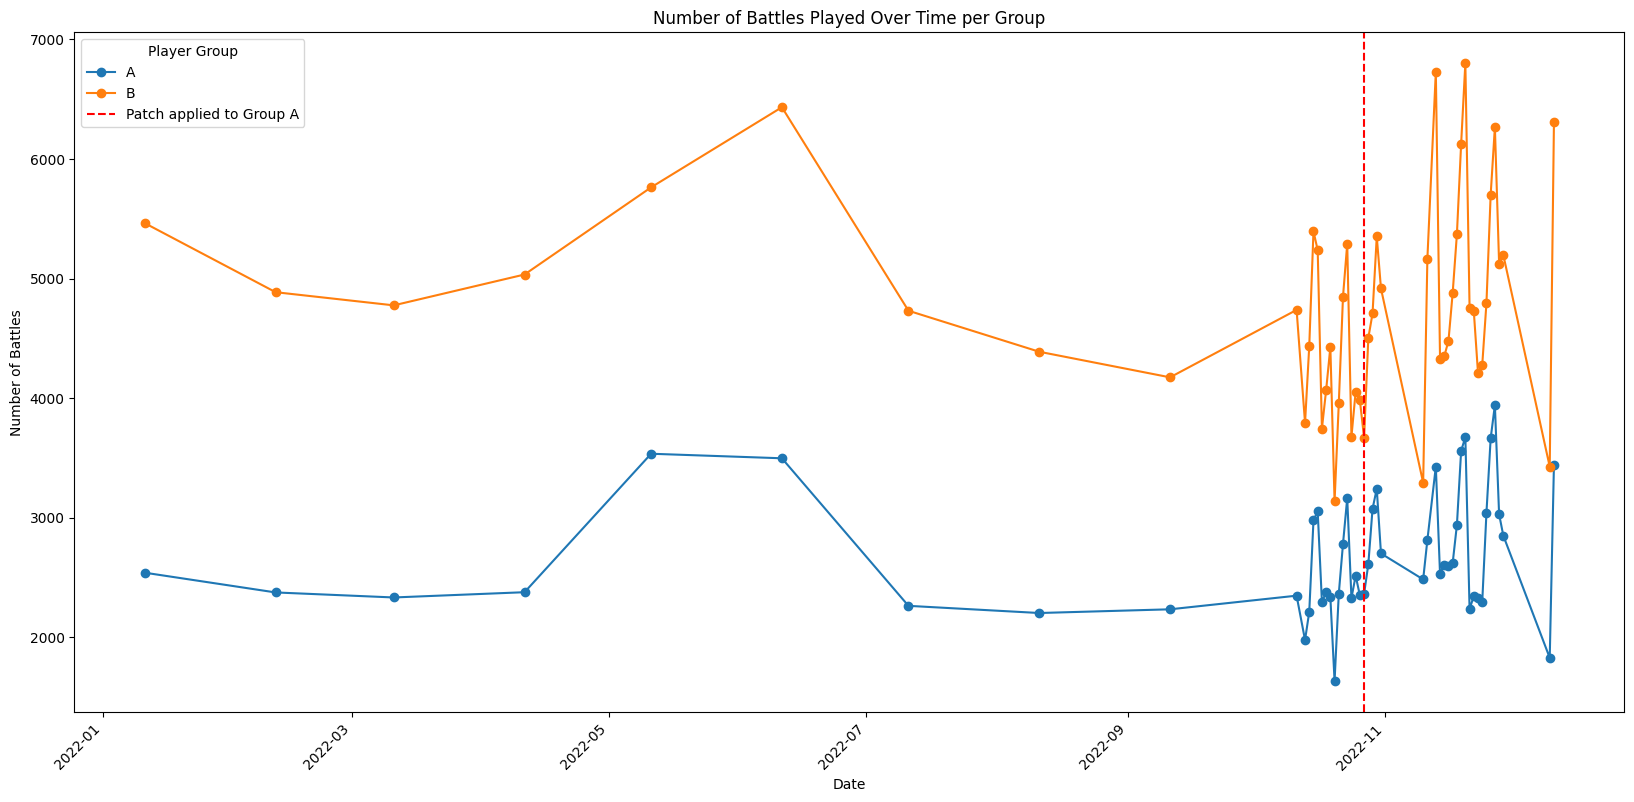

In [300]:
plt.figure(figsize=(20, 10))
battles_per_day_group.plot(style='-', marker='o', figsize=(20, 10))


plt.axvline(x=pd.Timestamp('2022-10-27'), color='red', linestyle='--', label='Patch applied to Group A')

plt.title('Number of Battles Played Over Time per Group')
plt.ylabel('Number of Battles')
plt.xlabel('Date')
plt.legend(title='Player Group')

plt.xticks(rotation=45)

plt.show()


Overall player activity : 

- At first glance, Group B seems to have consistently a higher average activity then group A throughout the timeframe. Group B seems to be more engaged with  the game in general with higher "peaks" in interest. 
- Around the "patch day", both group show an upward trend in activity, most likely linked with the release of the new patch/content in the game.
- The novelty quickly fades off as both groups quickly lose interest, but that could also be linked to other things (perhaps the new configurations were too complicated at first for players, or a hotfix was needed)
- However, player activity picks up and interest in the game is raised again, most likely due to the fact that players got used to the changes in the settings.
- It is also interesting to note that player activity seems a bit higher during weekends and the very high peak we can observe is on a sunday.
- Unfortunately, without more data and analysis, it's difficult to say conclusively whether the changes had a significant impact on Group A's activity compared to Group B

In [ ]:
daily_damage_group = df.groupby(['dt', 'player_group'])['damage_dealt'].mean().unstack()

In [331]:
fig = px.line(daily_damage_group, x=daily_damage_group.index, y=daily_damage_group.columns)
fig.update_layout(
    title='Average Damage Dealt Over Time per Group',
    xaxis_title='Date',
    yaxis_title='Average Damage Dealt',
    legend_title='Player Group',
    font_size=16,  
    margin=dict(l=20, r=20, b=20, t=40),  
)

fig.show()

It is interesting to note that despite the very large difference in size, group A goes hand in hand with B in terms of average damage dealt.
This leads to believe that group A might be more experienced and invites to look more into the accounts' ages and their respective gaming stats.

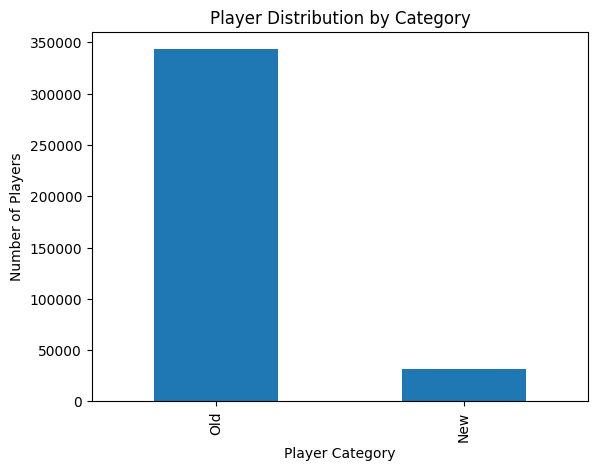

In [313]:
def categorize_player(row, threshold_date=pd.to_datetime("2022-09-27")):
  if not isinstance(row["account_created_at"], pd.Timestamp):
    row["account_created_at"] = pd.to_datetime(row["account_created_at"])
  
  return "New" if row["account_created_at"] > threshold_date else "Old"

df["player_category"] = df.apply(categorize_player, axis=1)

player_counts = df["player_category"].value_counts()
player_counts.plot(kind="bar", title="Player Distribution by Category")
plt.xlabel("Player Category")
plt.ylabel("Number of Players")
plt.show()


In [333]:
pre_patch = df[df["dt"] < "2022-10-27"]
post_patch = df[df["dt"] >= "2022-10-27"]

pre_patch_wins = pre_patch.groupby(["player_category", "player_group"])["kills_made"].sum()
post_patch_wins = post_patch.groupby(["player_category", "player_group"])["kills_made"].sum()
pre_patch_games = pre_patch.groupby(["player_category", "player_group"])["battle_id"].count()
post_patch_games = post_patch.groupby(["player_category", "player_group"])["battle_id"].count()

pre_patch_win_rate = pre_patch_wins / pre_patch_games
post_patch_win_rate = post_patch_wins / post_patch_games

fig_pre_patch = px.bar(
    pre_patch_win_rate.reset_index(),
    x="player_group",
    y=pre_patch_win_rate.values,  
    color="player_category",
    title="Pre-Patch Win Rate by Category & Group",
)

fig_post_patch = px.bar(
    post_patch_win_rate.reset_index(),
    x="player_group",
    y=post_patch_win_rate.values,  
    color="player_category",
    title="Post-Patch Win Rate by Category & Group",
)

fig_pre_patch.update_layout(width=800, height=500)
fig_post_patch.update_layout(width=800, height=500)
fig_pre_patch.show(config={'responsive': True})
fig_post_patch.show(config={'responsive': True})


It is interesting to note here that the patch slightly lowered older players winrate, which could potentially explain the decrease we observed in the number of games played.
Frustration towards change in players habits seems to have been adressed as the playrate went up after a while.


Overall, this dataset shows the impact of the patch on player's behaviors and stats.
We noticed that the playrate has increased due probably to curiosity after the patch was implemented, it helped newer players adapt to the game as it slightly increased their winrate but in general it seems to have had a positive impact on the community as players went back massively into the game once they got their new habits in.

I wish we had more data to explore in order to get more insights, despite my investigation, my lack of time didn't let me understand the segmentation between group A & B properly as they seemed to evolve in the same fashion. New data might be interesting in order to uncover the depth of the impact of patches in the game (esp monetization evolution).